In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [3]:
df =pd.read_csv('/Users/zoezhu/Downloads/midterm_data.csv')
df

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4
4998,4999,58,1,45.000000,11,24,203.42,0,Desktop,Location 5


In [4]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


we can see the device and location are not complete data set.
-device: (5000-4900)=100 missing data points
-location: (5000-4970)=30 missing data points

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


- for the userID,there are 5000 count, and mean is 2500.
- for the age,the mean age is 42, min age is 18, max age is 65.
- for the sessions, the median value is 5 and same with mean.
- for the device, there are 4900 counts,3 uniques,and the top device is Desktop, frequecy is 2538.
- for the location,the counts is 4970,5 uniques,and the top location is location_4

In [6]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


Q2.

DATA CLEANING

Let's identifying rows where all data points are missing.

In [7]:
#use a simple filter to check if any row has all column data missing
df[df['userID'].isnull() & df['age'].isnull() & df['sessions'].isnull() & df['time_spent'].isnull() & df['pages_visited'].isnull()& df['cart_items'].isnull()& df['cart_value'].isnull()& df['checkout_status'].isnull()& df['device'].isnull()& df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location


In [17]:
# The above yielded no rows, let's check situations where we have UserID & age &sessions
df[df['device'].isnull() & df['location'].isnull() & df['checkout_status'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location


In [18]:
df[df['device'].isnull() & df['location'].isnull() & df['time_spent'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location


In [19]:
df[df['device'].isnull() & df['location'].isnull() & df['cart_value'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location


These steps didn't show missing values.

In [13]:
# check remaining observations with both Device and Location missing
df[df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN


In [14]:
#We have 1 remaining observations,it is small number,so drop it.
df.drop(df[df['device'].isnull() & df['location'].isnull()].index, axis=0, inplace=True)


In [15]:
#check data 
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.573915,41.542509,5.027205,25.159160,5.774355,14.965593,149.424353,0.272454,NaN,NaN
std,1443.654943,14.040833,2.595218,9.826407,2.571097,6.046672,68.705704,0.445267,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.500000,29.000000,3.000000,18.267083,4.000000,10.000000,92.465000,0.000000,NaN,NaN
50%,2501.000000,42.000000,5.000000,25.036202,6.000000,15.000000,143.340000,0.000000,NaN,NaN
75%,3750.500000,54.000000,7.000000,32.001153,8.000000,20.000000,198.330000,1.000000,NaN,NaN


the data not change from this chart we can see.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4999 non-null   int64  
 1   age              4999 non-null   int64  
 2   sessions         4999 non-null   int64  
 3   time_spent       4999 non-null   float64
 4   pages_visited    4999 non-null   int64  
 5   cart_items       4999 non-null   int64  
 6   cart_value       4999 non-null   float64
 7   checkout_status  4999 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.6+ KB


Fill in missing Device and location data with "Other"

In [20]:
# Use the copy function to make a copy 
df_test = df.copy()

In [21]:
df_test.groupby('location').describe()

userID                                                          \
             count         mean          std  min      25%     50%     75%   
location                                                                     
Location 1   979.0  2428.888662  1460.439111  1.0  1115.00  2431.0  3683.5   
Location 2   950.0  2495.070526  1413.792983  4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060  2.0  1248.25  2378.5  3712.5   
Location 4  1056.0  2508.631629  1470.328379  3.0  1219.50  2517.5  3796.0   
Location 5   971.0  2598.049434  1434.875326  6.0  1352.50  2664.0  3849.0   

                       age             ... cart_value         checkout_status  \
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0   
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1056.0  40.892992  ...   199.5425  353.80          1056.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.284091  0.451194  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  

[5 rows x 64 columns]

In [22]:
#Fill missing data with 'others'
df_test['location'] = df_test['location'].fillna('Other')

In [23]:
df_test.groupby('location').describe()

userID                                                           \
             count         mean          std   min      25%     50%     75%   
location                                                                      
Location 1   979.0  2428.888662  1460.439111   1.0  1115.00  2431.0  3683.5   
Location 2   950.0  2495.070526  1413.792983   4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060   2.0  1248.25  2378.5  3712.5   
Location 4  1056.0  2508.631629  1470.328379   3.0  1219.50  2517.5  3796.0   
Location 5   971.0  2598.049434  1434.875326   6.0  1352.50  2664.0  3849.0   
Other         29.0  2354.379310  1310.371523  60.0  1460.00  2352.0  3325.0   

                       age             ... cart_value         checkout_status  \
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0   
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1056.0  40.892992  ...   199.5425  353.80          1056.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   
Other       4951.0    29.0  44.034483  ...   195.4400  237.64            29.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.284091  0.451194  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  
Other       0.275862  0.454859  0.0  0.0  0.0  1.0  1.0  

[6 rows x 64 columns]

we have roughly 29 entries, other categories is similar with other location,like mean,std 

<Axes: xlabel='location', ylabel='Count'>

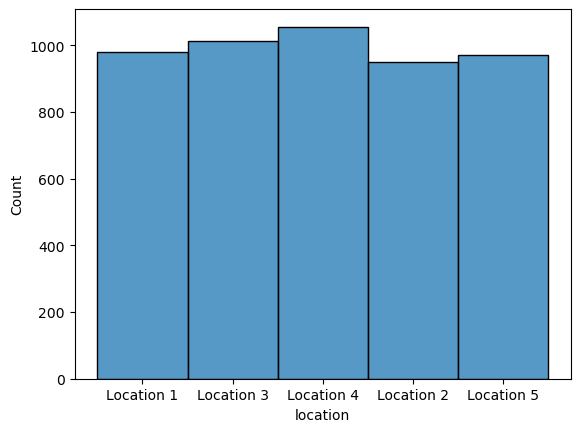

In [70]:
sns.histplot(df.reset_index()['location'])

<Axes: >

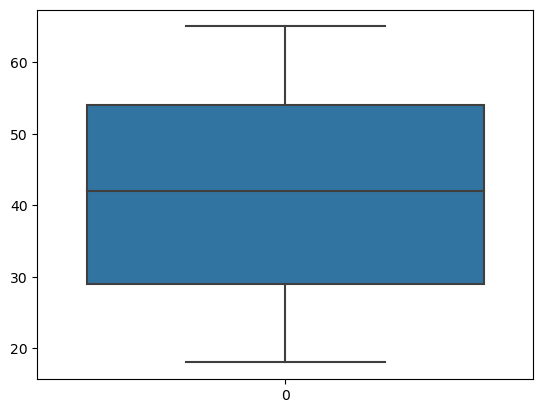

In [73]:
sns.boxplot(df['age'])

<Axes: xlabel='location', ylabel='time_spent'>

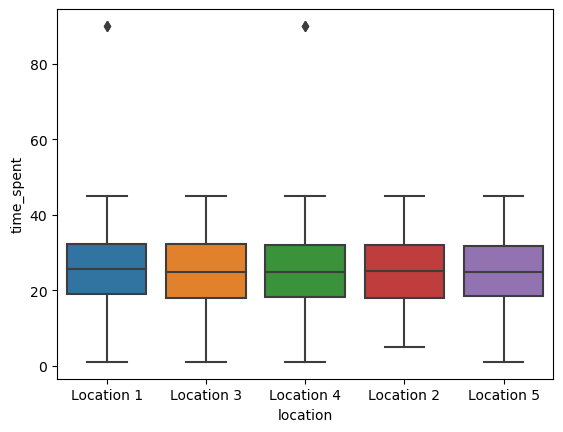

In [76]:
sns.boxplot(data = df.reset_index(),x = 'location',y ='time_spent')

<Axes: xlabel='device', ylabel='time_spent'>

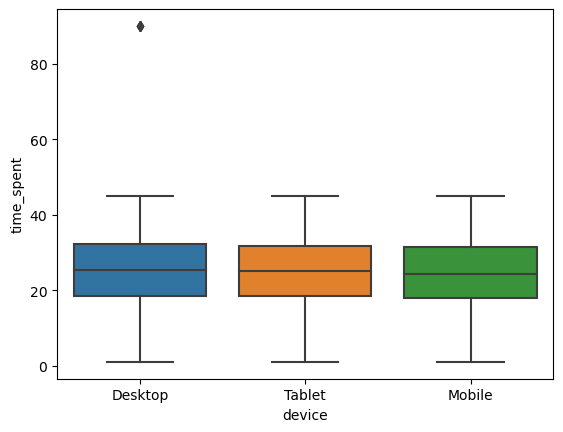

In [77]:
sns.boxplot(data = df.reset_index(),x = 'device',y ='time_spent')

In [79]:
# removing duplicates
df.reset_index(inplace=True)

In [80]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [81]:
# filling in missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   level_0          4999 non-null   int64  
 1   index            4999 non-null   int64  
 2   userID           4999 non-null   int64  
 3   age              4999 non-null   int64  
 4   sessions         4999 non-null   int64  
 5   time_spent       4999 non-null   float64
 6   pages_visited    4999 non-null   int64  
 7   cart_items       4999 non-null   int64  
 8   cart_value       4999 non-null   float64
 9   checkout_status  4999 non-null   int64  
 10  device           4900 non-null   object 
 11  location         4970 non-null   object 
dtypes: float64(2), int64(8), object(2)
memory usage: 507.7+ KB


In [82]:
df['device'] = df['device'].fillna('Unknown')

In [84]:
df['location'] = df['location'].fillna('Unknown')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   level_0          4999 non-null   int64  
 1   index            4999 non-null   int64  
 2   userID           4999 non-null   int64  
 3   age              4999 non-null   int64  
 4   sessions         4999 non-null   int64  
 5   time_spent       4999 non-null   float64
 6   pages_visited    4999 non-null   int64  
 7   cart_items       4999 non-null   int64  
 8   cart_value       4999 non-null   float64
 9   checkout_status  4999 non-null   int64  
 10  device           4999 non-null   object 
 11  location         4999 non-null   object 
dtypes: float64(2), int64(8), object(2)
memory usage: 507.7+ KB


Q2.I describe various values of the data, and convert it into other and unknown according to the missing data in info. Each different property is represented by a different graph. check remaining observations with all categories.

Q1.

In [24]:
#Write a function to find the average cart_value by device
df.groupby('device')['cart_value'].agg(['mean','max','min'])

,mean,max,min
device,,,
Desktop,149.369310,427.40,28.11
Mobile,151.059461,387.98,20.41
Tablet,147.336199,377.98,29.79


the Mobile is highest average device, and Tablet is lowest.

In [27]:
#Write a function to find the average cart_value by location
df.groupby('location')['cart_value'].agg('mean')

location
Location 1    153.111083
Location 2    149.254958
Location 3    147.610779
Location 4    147.753627
Location 5    149.507662
Name: cart_value, dtype: float64

the location_1 is the highest cart value ,the location_3 is lowest.

In [30]:
# How many customers purchase each device?
df.groupby('device')['age'].count()

device
Desktop    2538
Mobile     1428
Tablet      934
Name: age, dtype: int64

In [32]:
df['device'].value_counts()

Desktop    2538
Mobile     1428
Tablet      934
Name: device, dtype: int64

In [34]:
#age
df['age'].describe()

count    4999.000000
mean       41.542509
std        14.040833
min        18.000000
25%        29.000000
50%        42.000000
75%        54.000000
max        65.000000
Name: age, dtype: float64

As we can see, the avg age is 43, and Desktop is most popular device. Let's we analysis the behaviour or characteristics of users who complete check out vs those who do not.

In [41]:
# Let's we compare the checkout_status with average age for the users
age_checked_out = df.loc[df['checkout_status'] == 1, 'age'].mean().round(2)
age_not_checked_out = df.loc[df['checkout_status'] == 0, 'age'].mean().round(2)
print(age_checked_out)
print(age_not_checked_out)

41.33
41.62


As we can see, the average age is same, around 41.

In [42]:
# compare the Time spent for the users
df.groupby('checkout_status')['time_spent'].agg(['mean','max','min'])

,mean,max,min
checkout_status,,,
0,22.852800,90.000000,1.000000
1,31.317918,39.966537,25.000659


As we can see, the not checked out users spend mean time is 22.85,max is 90, the min is 1.and checked out users's mean is 31.31,max is 39.96, the min is 25. For analysis, the checkout user's mean is higher than the not checked out user, but the max is lower.

In [43]:
#pages_visited
df.groupby('checkout_status')['pages_visited'].agg(['mean','max','min'])

,mean,max,min
checkout_status,,,
0,5.207589,12,1
1,7.287812,12,2


the checked out user pages visited times(mean),is higher than not checked out, they may consider longer time than other users.

In [44]:
#cart_items
df.groupby('checkout_status')['cart_items'].agg(['mean','max','min'])

,mean,max,min
checkout_status,,,
0,15.282101,25,5
1,14.120411,20,8


Even not checked out user cart items higehr than checked out user, but they didn't buy the items.

In [45]:
#cart_value
df.groupby('checkout_status')['cart_value'].agg(['mean','max','min'])

,mean,max,min
checkout_status,,,
0,152.644971,427.40,20.41
1,140.824214,313.76,43.22


the checkout user often choose more valuables items.

In [66]:
#device
checkout_completed = df[df['checkout_status'] == 1]
checkout_not_completed = df[df['checkout_status'] == 0]

In [65]:
checkout_completed.groupby('device')['checkout_status'].describe()

,count,mean,std,min,25%,50%,75%,max
device,,,,,,,,
Desktop,724.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Mobile,378.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Tablet,238.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [67]:
checkout_not_completed.groupby('device')['checkout_status'].describe()

,count,mean,std,min,25%,50%,75%,max
device,,,,,,,,
Desktop,1814.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mobile,1050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tablet,696.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


as the device and checkout status,for completed, the most popular device is Desktop,and Tablet is smallest. for not completed,the result is same. But the not completed count is higher than completed. this can show lots of potential customers for this device

In [68]:
# compare the each location ,which most popular
checkout_completed.groupby('location')['checkout_status'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Location 1,277.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Location 2,253.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Location 3,265.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Location 4,300.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Location 5,259.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


the location_4 is highest for the completed users, and the Location_2 is the lowest.

In [69]:
#not completed
checkout_not_completed.groupby('location')['checkout_status'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Location 1,702.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Location 2,697.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Location 3,749.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Location 4,756.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Location 5,712.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


the not completed users,the location_4 is also the highest location, and location is the lowest.

Q1.According to the comparison of each category, the average age of users in both states is 41, and users who complete the purchase generally spend more time browsing the page and watch more page views because it takes Make decisions and compare different products. However, the number of unfinished users in the shopping cart is large, indicating that there are also many potential customers, and the prices of these items often have higher value. For purchasing customers, Desktop is the most popular in location_4, and more potential customers also pay attention to Desktop.

 Q3.For the product team's suggestion, the target users have higher shopping cart value. Since users who do not complete the purchase usually have higher shopping cart value, the product team should focus on encouraging users to buy high-value shopping cart products. By implementing promotional strategies, such as making discounts for high-value products, and automatically popping up complementary products on the web page.
 Enhanced user experience, through results analysis, users who complete a purchase tend to spend more time browsing the site and visit more pages. Product teams can increase order rates by optimizing pages, providing clear and detailed product information, and improving the customer shopping experience.
 Reduce the probability of incomplete shopping carts, where a large number of users add items to the shopping cart but do not complete the purchase. Identify and summarize causes, and implement strategies to address them. For example, send emails to remind users that there are still unpurchased items in the shopping cart, and introduce more discounts to encourage customers to place orders.
 Target Location_4 and desktop users, desktop users, especially location_4, show higher checkout completion rates. Product teams can allocate more resources to optimize the desktop experience and maintain customers through long-term development strategies. Additionally, conducting user research on location_4 helped the team better understand user preferences and why this region buys more.
 Continuously monitor and analyze user behavior, the product team continuously monitors and analyzes user behavior, checkout channel data and other relevant indicators. This can help the team's long-term development, and after having a lot of data, you can conduct a t-test to test whether the program is effective, and it is conducive to the improvement of the team and the development of potential customers.